# Project Overview
# **Stock Price Prediction using LSTM (Deep Learning)**

Steps to Build the Project in Python

Step 1: Install Dependencies


In [ ]:
pip install pandas numpy matplotlib seaborn tensorflow keras scikit-learn


Step 2️: Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


Step 3: Load the Stock Data

In [ ]:
df = pd.read_csv('/content/stock_prices.csv', parse_dates=['Date'], index_col='Date')
df = df[['Close']]  # Using only the closing price
df.head()


,Close
Date,
2023-01-01,100.993428
2023-01-02,100.716900
2023-01-03,102.012277
2023-01-04,105.058336
2023-01-05,104.590030


Step 4: Preprocess the Data

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)


Step 5: Create Sequences for LSTM

In [ ]:
def create_sequences(data, seq_length=50):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50
X, y = create_sequences(df_scaled, seq_length)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM


Step 6:  Build the LSTM Model

In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Step 7: Train the Model

In [ ]:
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - loss: 0.1097 - val_loss: 0.0188
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0269 - val_loss: 0.0712
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0167 - val_loss: 0.0216
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0116 - val_loss: 0.0116
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0126 - val_loss: 0.0246
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0102 - val_loss: 0.0089
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0091 - val_loss: 0.0142
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0092 - val_loss: 0.0080
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - val_loss: 0.0110
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0075 - val_loss: 0.0073
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0070 - val_loss: 0.0096


Step 8: Make Future Predictions

In [ ]:
test_input = df_scaled[-seq_length:].reshape(1, seq_length, 1)
predicted_price = model.predict(test_input)
predicted_price = scaler.inverse_transform(predicted_price)
print("Predicted Stock Price:", predicted_price[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
Predicted Stock Price: 104.23911


Step 9:  Plot Predictions

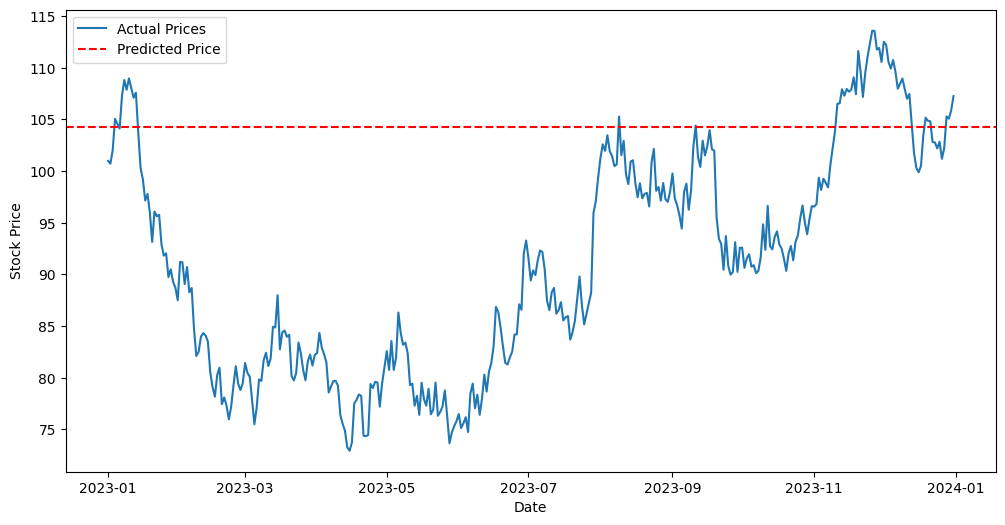

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df, label="Actual Prices")
plt.axhline(y=predicted_price[0][0], color='red', linestyle='dashed', label="Predicted Price")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# Project: Stock Price Prediction using LSTM (Long Short-Term Memory)
This project focuses on predicting stock prices using deep learning, specifically LSTM (Long Short-Term Memory) networks. LSTMs are excellent for sequential data, such as stock prices, because they can capture long-term dependencies.
🔹 What Does This Project Do?
    Loads historical stock price data (CSV file).
    Preprocesses the data (scaling, reshaping).
    Creates training sequences for LSTM.
    Builds an LSTM-based neural network.
    Trains the model on past stock prices.
    Predicts future stock prices.
    Visualizes predictions against actual prices
